In [1]:
import pandas as pd

df = pd.read_csv('./penguins.csv')
df = df.drop(columns=['year'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [2]:
df_bool1 = df['bill_length_mm'].isna()

for i, v in enumerate(df_bool1):
    if v == False:
        df_bool1[i] = True
    else:
        df_bool1[i] = False
        
df = df[df_bool1]

df.reset_index().drop(axis=1, columns=['index'])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
338,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
339,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
340,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


In [3]:
df_no_sex_data = df[df['sex'].isna()]

df_no_sex_data = df_no_sex_data.reset_index().drop(axis=1, columns=['index'])
df_no_sex_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
1,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
2,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
3,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
4,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
5,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
6,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
7,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
8,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [4]:
df = df.dropna(how='any')
df = df.reset_index().drop(axis=1, columns=['index'])
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
329,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
330,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
331,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male


rom sklearn.preprocessing import OneHotEncoder 시도하였는데,
변경된 데이터에서 입력한 데이터프레임과 순서가 맞지 않아서 쓰지 get_dummies 이용함.

--> DataFrame 변경 시 순서 문제가 발생한 것이었고, index=df_drop_island.index 파라미터를 사용하면 순서가 유지된다.

In [5]:
df_drop_island = df.drop(columns=['island'])
df_drop_island

species_list = df_drop_island['species'].unique()

from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder(categories=[species_list])

print(species_list)

df_species = pd.DataFrame(ordinalencoder.fit_transform(df_drop_island[['species']]), index=df_drop_island.index)

df_drop_island['species'] = df_species.rename(columns={0:"species"})
df_drop_island

['Adelie' 'Gentoo' 'Chinstrap']


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,39.1,18.7,181.0,3750.0,male
1,0.0,39.5,17.4,186.0,3800.0,female
2,0.0,40.3,18.0,195.0,3250.0,female
3,0.0,36.7,19.3,193.0,3450.0,female
4,0.0,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
328,2.0,55.8,19.8,207.0,4000.0,male
329,2.0,43.5,18.1,202.0,3400.0,female
330,2.0,49.6,18.2,193.0,3775.0,male
331,2.0,50.8,19.0,210.0,4100.0,male


In [6]:
df_drop_species = df.drop(columns=['species'])

island_list = df_drop_species['island'].unique()
print(island_list)

ordinalencoder = OrdinalEncoder(categories=[island_list])

df_island = pd.DataFrame(ordinalencoder.fit_transform(df_drop_species[['island']]), index=df_drop_species.index)

df_drop_species['island'] = df_island.rename(columns={0:"island"})
df_drop_species

['Torgersen' 'Biscoe' 'Dream']


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,39.1,18.7,181.0,3750.0,male
1,0.0,39.5,17.4,186.0,3800.0,female
2,0.0,40.3,18.0,195.0,3250.0,female
3,0.0,36.7,19.3,193.0,3450.0,female
4,0.0,39.3,20.6,190.0,3650.0,male
...,...,...,...,...,...,...
328,2.0,55.8,19.8,207.0,4000.0,male
329,2.0,43.5,18.1,202.0,3400.0,female
330,2.0,49.6,18.2,193.0,3775.0,male
331,2.0,50.8,19.0,210.0,4100.0,male


성별 컬럼 one-hot encoding

In [7]:
y_species = df_drop_island['species']
df_species_data = df_drop_island.drop(axis=1, columns=['species'])
df_species_data = pd.get_dummies(df_species_data, dtype='int64')
df_species_data


y_island = df_drop_species['island']
df_island_data = df_drop_species.drop(axis=1, columns=['island'])
df_island_data = pd.get_dummies(df_island_data, dtype='int64')
df_island_data

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
3,36.7,19.3,193.0,3450.0,1,0
4,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
328,55.8,19.8,207.0,4000.0,0,1
329,43.5,18.1,202.0,3400.0,1,0
330,49.6,18.2,193.0,3775.0,0,1
331,50.8,19.0,210.0,4100.0,0,1


C:\Users\rhwkw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rhwkw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rhwkw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\rhwkw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

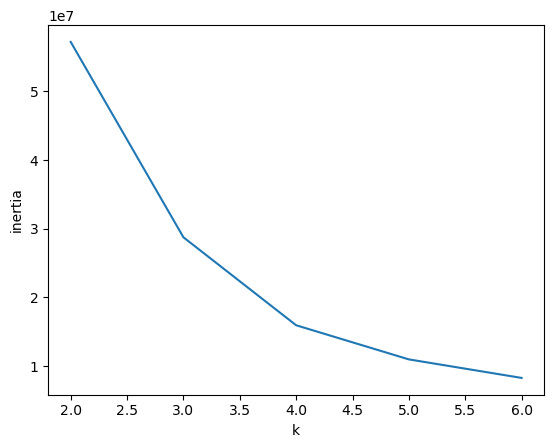

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

penguins_data = df_island_data

inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(penguins_data)
    inertia.append(km.inertia_)
    
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [9]:
km = KMeans(n_clusters=3, random_state=42)

km.fit(penguins_data)

C:\Users\rhwkw\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [11]:
km.labels_

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2,

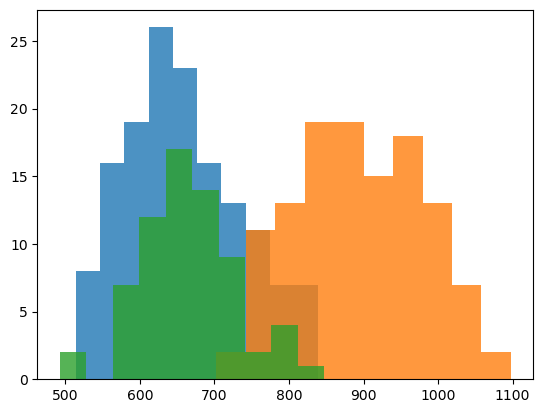

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(np.mean(penguins_data[y_species == 0], axis=1), alpha=0.8)
plt.hist(np.mean(penguins_data[y_species == 1], axis=1), alpha=0.8)
plt.hist(np.mean(penguins_data[y_species == 2], axis=1), alpha=0.8)
plt.show()

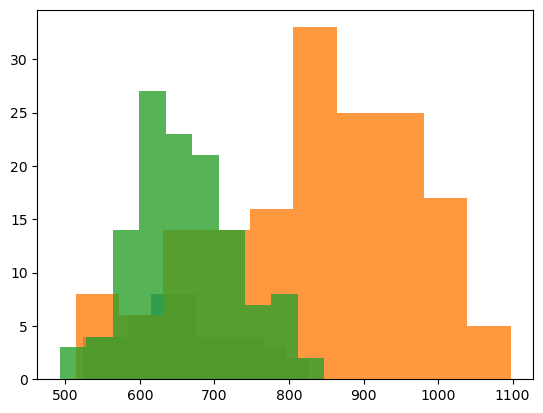

In [13]:
plt.hist(np.mean(penguins_data[y_island == 0], axis=1), alpha=0.8)
plt.hist(np.mean(penguins_data[y_island == 1], axis=1), alpha=0.8)
plt.hist(np.mean(penguins_data[y_island == 2], axis=1), alpha=0.8)
plt.show()

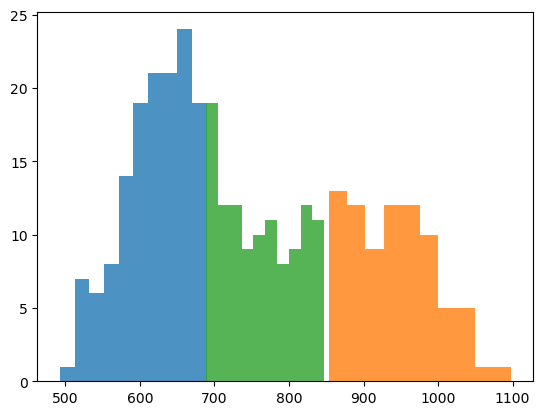

In [18]:
plt.hist(np.mean(penguins_data[km.labels_ == 0], axis=1), alpha=0.8)
plt.hist(np.mean(penguins_data[km.labels_ == 1], axis=1), alpha=0.8)
plt.hist(np.mean(penguins_data[km.labels_ == 2], axis=1), alpha=0.8)
plt.show()

In [19]:
penguins_data[y_species == 0].shape

(146, 6)

In [20]:
np.mean(penguins_data[y_species == 0], axis=1)

0      664.966667
1      673.983333
2      584.050000
3      616.666667
4      650.150000
          ...    
141    619.166667
142    616.633333
143    666.650000
144    656.850000
145    710.333333
Length: 146, dtype: float64

스케일링를 하지 않아서 값의 크기 차이가 발생한다.

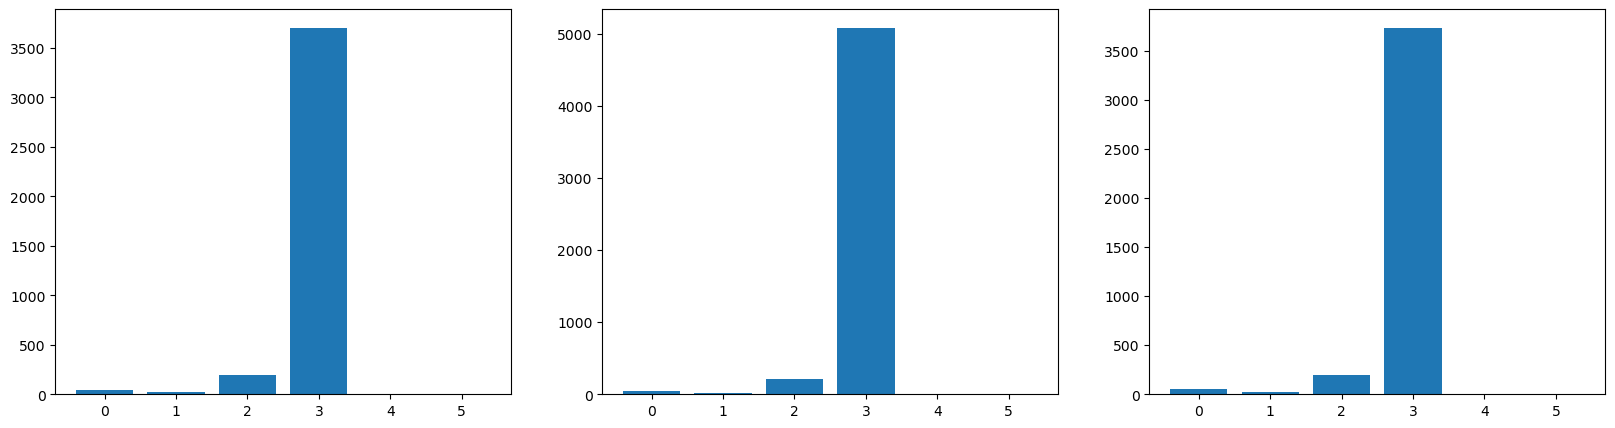

In [22]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(6), np.mean(penguins_data[y_species == 0], axis=0))
axs[1].bar(range(6), np.mean(penguins_data[y_species == 1], axis=0))
axs[2].bar(range(6), np.mean(penguins_data[y_species == 2], axis=0))
plt.show()

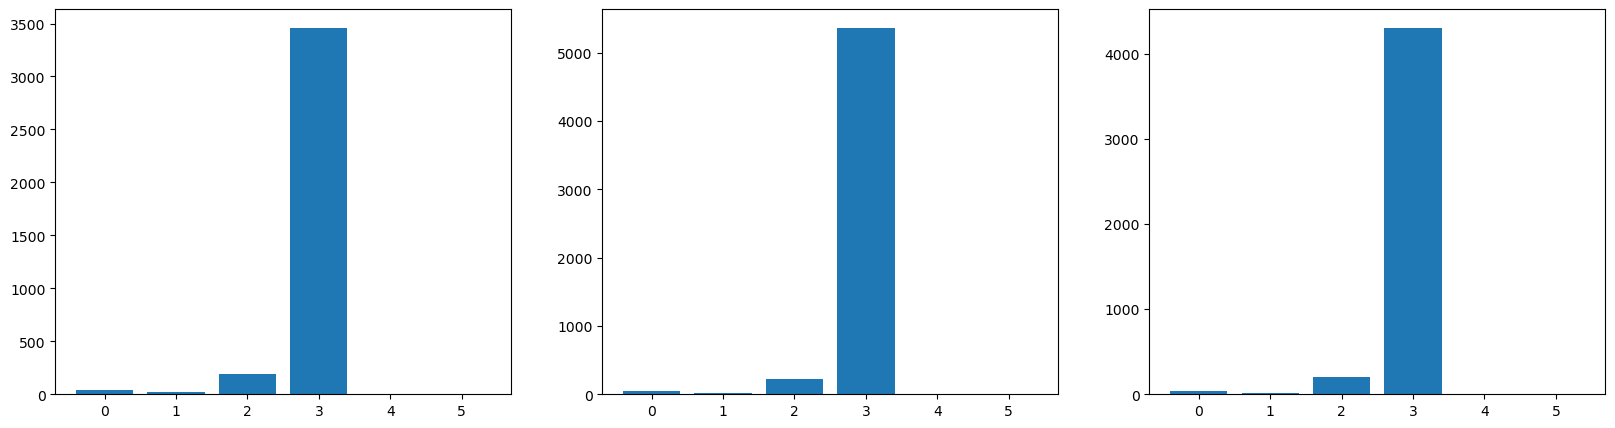

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(6), np.mean(penguins_data[km.labels_ == 0], axis=0))
axs[1].bar(range(6), np.mean(penguins_data[km.labels_ == 1], axis=0))
axs[2].bar(range(6), np.mean(penguins_data[km.labels_ == 2], axis=0))
plt.show()

In [24]:
mean_0 = np.mean(penguins_data[y_species == 0], axis=0)
mean_1 = np.mean(penguins_data[y_species == 1], axis=0)
mean_2 = np.mean(penguins_data[y_species == 2], axis=0)

In [39]:
abs_diff = np.abs(penguins_data - mean_0)
abs_mean = np.mean(abs_diff, axis=1)

index_0 = np.argsort(abs_mean)[:333]
index_0

0       90
1       49
2       68
3       70
4      144
      ... 
328    254
329    259
330    221
331    178
332    163
Length: 333, dtype: int64

In [27]:
abs_diff = np.abs(penguins_data - mean_1)
abs_mean = np.mean(abs_diff, axis=1)

index_1 = np.argsort(abs_mean)[:333]
index_1

0      171
1      216
2      193
3      169
4      200
      ... 
328     48
329     92
330     58
331     52
332    303
Length: 333, dtype: int64

In [28]:
abs_diff = np.abs(penguins_data - mean_2)
abs_mean = np.mean(abs_diff, axis=1)

index_2 = np.argsort(abs_mean)[:333]
index_2

0      269
1      272
2      137
3       94
4       53
      ... 
328    254
329    259
330    221
331    178
332    163
Length: 333, dtype: int64

In [66]:
y_species.to_numpy().astype('int64')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [55]:
km.predict(penguins_data.iloc[index_0])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [56]:
km.predict(penguins_data.iloc[index_1])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
km.predict(penguins_data.iloc[index_2])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,